In [ ]:
pip install bokeh

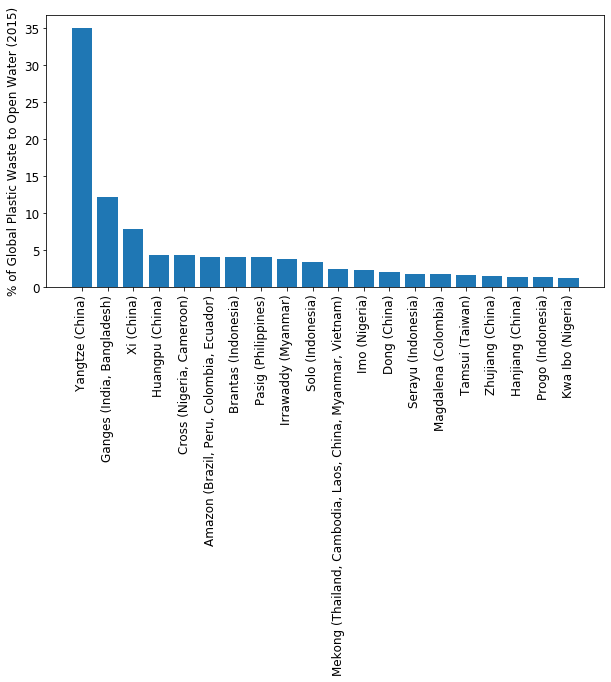

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
riverData=pd.read_csv('plastic-top-20-rivers.csv')
riverData = riverData.drop(columns=['Code','Year']).sort_values(by=['Plastic mass input from rivers (tonnes)'],ascending=False)
overallWaste=riverData['Plastic mass input from rivers (tonnes)'].sum()
riverData['Pareto']=100*riverData['Plastic mass input from rivers (tonnes)']/overallWaste

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(riverData["Entity"], riverData["Pareto"], color="C0")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('% of Global Plastic Waste to Open Water (2015)', fontsize=12)
#plt.figure(figsize=(4,6))
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


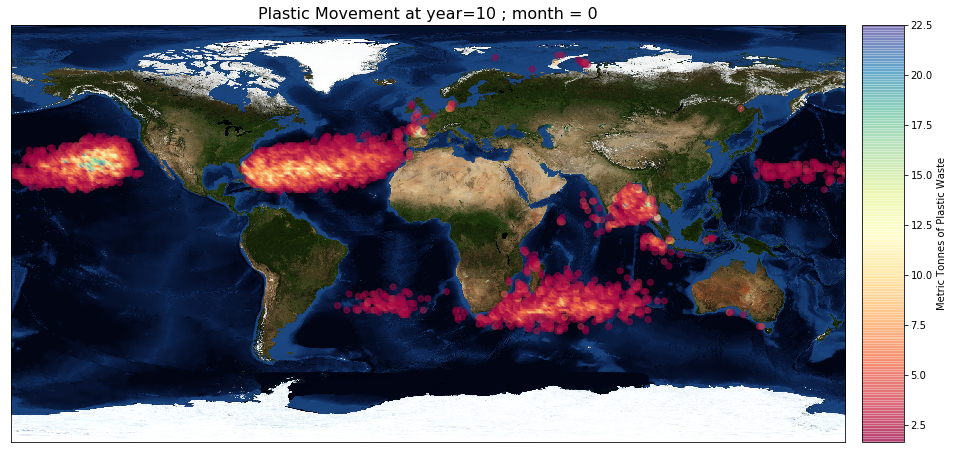

In [203]:
import pandas as pd
from mpl_toolkits.basemap import Basemap

gangesRiver=pd.read_csv("ganges.csv")
yangtzeRiver=pd.read_csv("yangtze.csv")
amazonRiver=pd.read_csv("amazon.csv")

plt.figure(figsize=(16, 12))
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

latitude=gangesRiver[(gangesRiver['year']==10) & (gangesRiver['month']==0)]['lat']
latitudeY=yangtzeRiver[(yangtzeRiver['year']==10) & (yangtzeRiver['month']==0)]['lat']
latitudeZ=amazonRiver[(amazonRiver['year']==10) & (amazonRiver['month']==0)]['lat']

longitude=gangesRiver[(gangesRiver['year']==10) & (gangesRiver['month']==0)]['lng']
longitudeY=yangtzeRiver[(yangtzeRiver['year']==10) & (yangtzeRiver['month']==0)]['lng']
longitudeZ=amazonRiver[(amazonRiver['year']==10) & (amazonRiver['month']==0)]['lng']

probability=gangesRiver[(gangesRiver['year']==10) & (gangesRiver['month']==0)]['probability']
probabilityY=yangtzeRiver[(yangtzeRiver['year']==10) & (yangtzeRiver['month']==0)]['probability']
probabilityZ=amazonRiver[(amazonRiver['year']==10) & (amazonRiver['month']==0)]['probability']

amazonRiver['LatCode']=amazonRiver['lat']//10
amazonRiver['LongCode']=amazonRiver['lng']//10

m.bluemarble()
#m.shadedrelief()
#m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
yangtzeFactor = riverData['Pareto'][0]*overallWaste/200
gangesFactor = riverData['Pareto'][1]*overallWaste/200
amazonFactor = riverData['Pareto'][5]*overallWaste/200
m.scatter(longitude, latitude, latlon=True,
          c=probability*gangesFactor,
          cmap='Spectral', alpha=0.5)
m.scatter(longitudeY, latitudeY, latlon=True,
          c=probabilityY*yangtzeFactor,
          cmap='Spectral', alpha=0.5)
m.scatter(longitudeZ, latitudeZ, latlon=True,
          c=probabilityZ*amazonFactor,
          cmap='Spectral', alpha=0.5)
m.colorbar(label=r'Metric Tonnes of Plastic Waste')
plt.title('Plastic Movement at year=10 ; month = 0', fontsize=16)
plt.show()